# Capstone 3 
## Exploratory Data Analysis

First we import

In [63]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [16]:
df=pd.read_csv('../data/clean/Online Retail.csv')

C:\Users\alw-hp-17\AppData\Local\Temp\ipykernel_18916\407858579.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/clean/Online Retail.csv')


Examine the data

In [17]:
df.sample(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
377569,570488,22811,SET OF 6 T-LIGHTS CACTI,2,2011-10-10 17:12:00,5.79,14096.0,United Kingdom
59906,541489,21355,TOAST ITS - I LOVE YOU,2,2011-01-18 13:38:00,1.25,15023.0,United Kingdom
374737,570252,21181,PLEASE ONE PERSON METAL SIGN,12,2011-10-10 09:14:00,2.10,14665.0,United Kingdom
119899,546917,79403,FROSTED WHITE BASE,12,2011-03-18 09:17:00,0.85,14911.0,EIRE
192026,554054,21531,RED RETROSPOT SUGAR JAM BOWL,1,2011-05-20 15:29:00,4.96,0.0,United Kingdom
308606,564837,21975,PACK OF 60 DINOSAUR CAKE CASES,1,2011-08-30 12:40:00,1.25,0.0,United Kingdom
277589,562034,21217,RED RETROSPOT ROUND CAKE TINS,1,2011-08-02 09:14:00,9.95,12449.0,Belgium


In [74]:
df.sample(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
431776,574864,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-11-07 12:29:00,2.95,14387,United Kingdom,5.90
402453,572549,22728,ALARM CLOCK BAKELIKE PINK,1,2011-10-24 17:03:00,7.46,0,United Kingdom,7.46
288728,562984,22327,ROUND SNACK BOXES SET OF 4 SKULLS,2,2011-08-11 11:45:00,2.95,17841,United Kingdom,5.90
23270,538313,22729,ALARM CLOCK BAKELIKE ORANGE,1,2010-12-10 13:50:00,3.75,15514,United Kingdom,3.75
76731,542932,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-02-02 10:54:00,2.55,13089,United Kingdom,81.60
505991,580401,22966,GINGERBREAD MAN COOKIE CUTTER,12,2011-12-04 11:50:00,1.25,17618,United Kingdom,15.00
31463,539099,22819,"BIRTHDAY CARD, RETRO SPOT",12,2010-12-16 10:30:00,0.42,16670,United Kingdom,5.04


In [36]:
df['Total']=df.Quantity*df.UnitPrice

In [75]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


<AxesSubplot:>

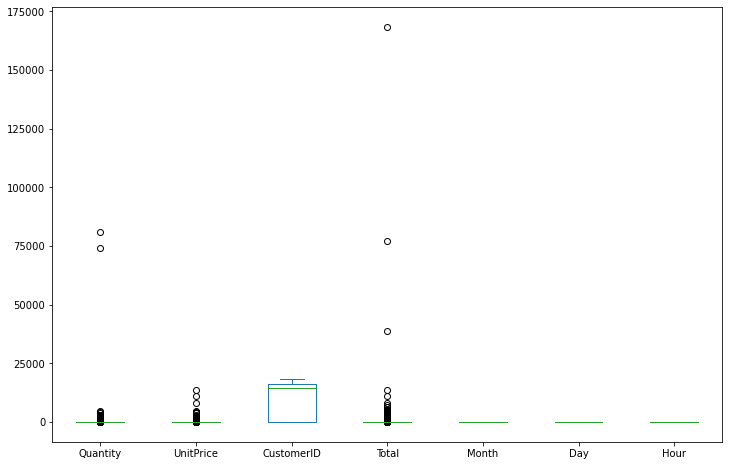

In [88]:
df.plot(
    kind="box", figsize=(12, 8)
)

<AxesSubplot:ylabel='Frequency'>

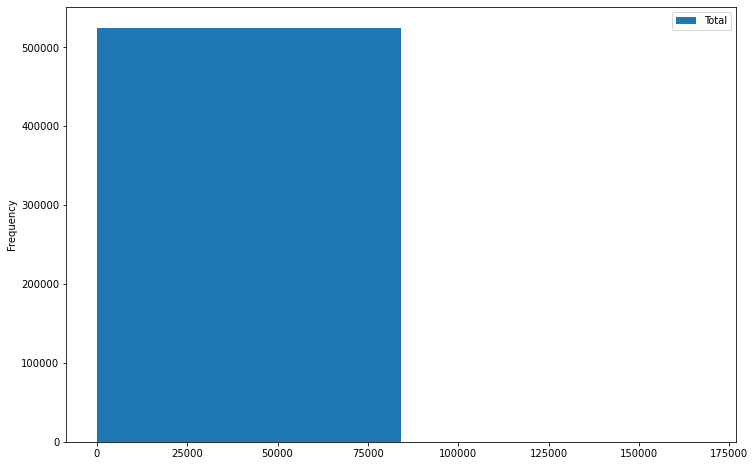

In [40]:
df.plot(
    kind="hist",  # Specifies a histogram
    y="Total",  # Replace with a numeric column of interest
    bins=2,  # Set the number of bins in the histogram
    figsize=(12, 8)  # Set width & height in inches
)

<AxesSubplot:xlabel='Country', ylabel='Average Purchase'>

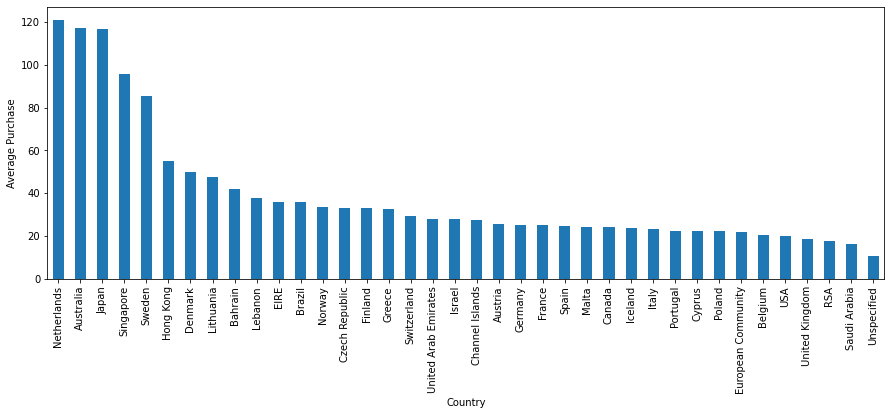

In [49]:
df_bar = df.groupby(["Country"])["Total"].mean().sort_values(ascending=False)

df_bar.plot(
    kind="bar",  # Specifies vertical bar plot
    ylabel="Average Purchase",  # Add a y-axis label
    xlabel="Country",  # Add a x-axis label
    figsize=(15, 5)  # Set width & height in inches
)

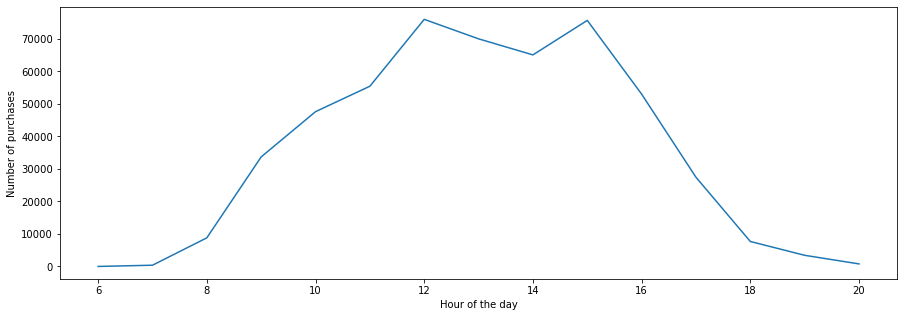

In [72]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df_dates = df["InvoiceNo"].groupby([df["InvoiceDate"].dt.hour]).count()
df_dates.plot(
    kind="line",  # Specifies line plot
    ylabel="Number of purchases",  # Add a y-axis label
    xlabel="Hour of the day",  # Add a x-axis label
    figsize=(15, 5)  # Set width & height in inches
)
plt.show()

<AxesSubplot:xlabel='Total', ylabel='Quantity'>

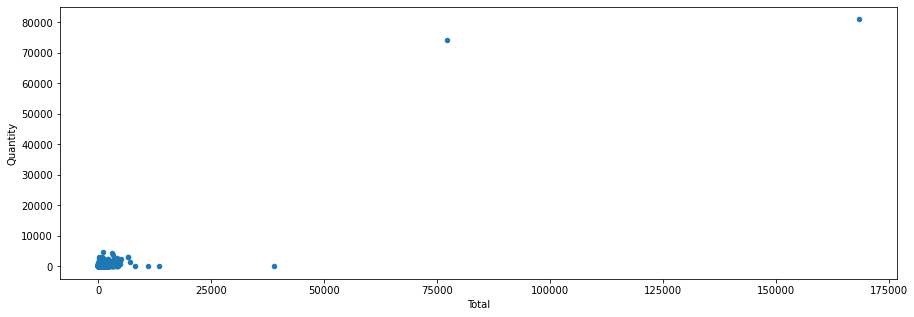

In [59]:
df.plot(
    kind="scatter",  # Specifies a scatter plot
    x="Total",  # Replace with a numeric column for the x-axis
    y="Quantity",  # Replace with a numeric column for the y-axis
    figsize=(15, 5)  # Set width & height in inches
)

In [60]:
cm = df.corr()
print(cm)

            Quantity  UnitPrice  CustomerID     Total
Quantity    1.000000  -0.003788    0.025630  0.907402
UnitPrice  -0.003788   1.000000   -0.038384  0.137381
CustomerID  0.025630  -0.038384    1.000000  0.013746
Total       0.907402   0.137381    0.013746  1.000000


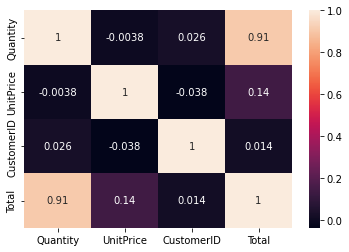

In [61]:
sn.heatmap(cm, annot=True)
plt.show()

Text(0.5, 1.0, 'Purchases')

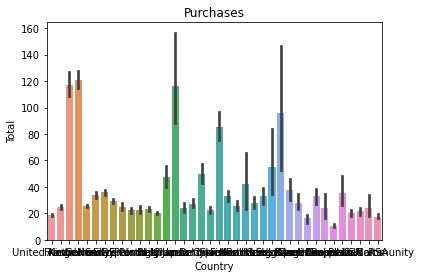

In [76]:
sns.barplot(data=df, y='Total', x='Country').set_title('Purchases')

In [82]:
import datetime as dt

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [83]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8


D:\Users\alw-hp-17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Hourly Sales'}, xlabel='Hour', ylabel='Quantity'>

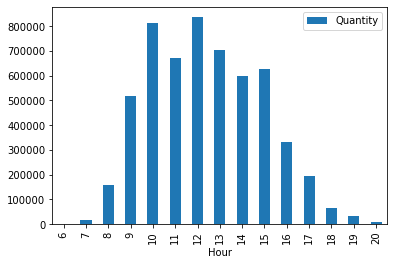

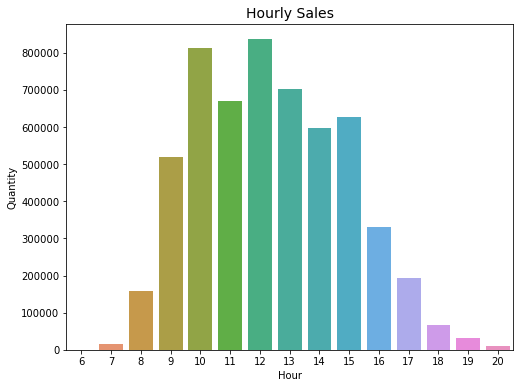

In [85]:
hourly_sales = df[['Hour', 'Quantity']].groupby('Hour').sum()
hourly_sales.plot(kind='bar')
plt.figure(figsize=(8,6))
plt.title("Hourly Sales", fontsize=14)
sns.barplot(hourly_sales.index, hourly_sales['Quantity'])

D:\Users\alw-hp-17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Daily Sales'}, xlabel='Day', ylabel='Quantity'>

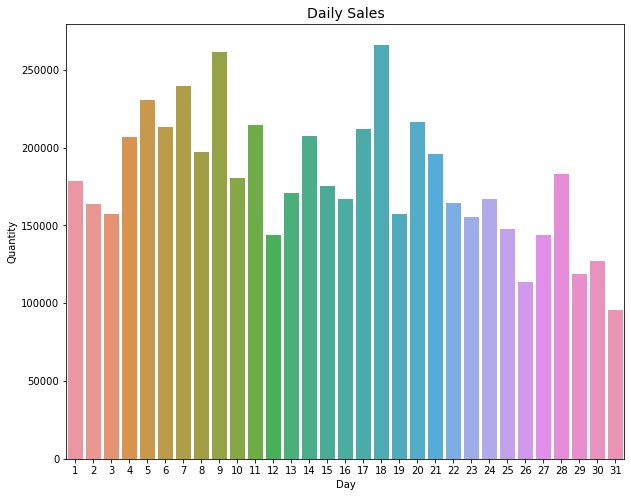

In [86]:
daily_sales = df[['Day', 'Quantity']].groupby('Day').sum()
plt.figure(figsize=(10,8))
plt.title("Daily Sales", fontsize=14)
sns.barplot(daily_sales.index, daily_sales['Quantity'])

D:\Users\alw-hp-17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Monthly Sales'}, xlabel='Month', ylabel='Quantity'>

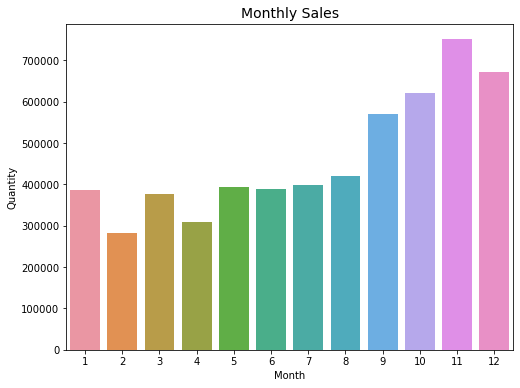

In [87]:
monthly_sales = df[['Month', 'Quantity']].groupby('Month').sum()
plt.figure(figsize=(8,6))
plt.title("Monthly Sales", fontsize=14)
sns.barplot(monthly_sales.index, monthly_sales['Quantity'])